In [111]:

from google.colab import files
uploaded = files.upload()

#Load Libraries

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#My first look at Data


In [113]:
df = pd.read_csv('hotel_bookings.csv')

In [114]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [115]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [116]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [117]:
print(df.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

# Identify Missing Values

In [118]:
missing_counts = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

In [119]:
missing_data = pd.DataFrame({
    "Missing Values": missing_counts,
    "Percentage (%)": missing_percentage
})

print(missing_data.sort_values(by="Missing Values", ascending=False))

                                Missing Values  Percentage (%)
company                                 112593       94.306893
agent                                    16340       13.686238
country                                    488        0.408744
children                                     4        0.003350
arrival_date_month                           0        0.000000
arrival_date_week_number                     0        0.000000
hotel                                        0        0.000000
is_canceled                                  0        0.000000
stays_in_weekend_nights                      0        0.000000
arrival_date_day_of_month                    0        0.000000
adults                                       0        0.000000
stays_in_week_nights                         0        0.000000
babies                                       0        0.000000
meal                                         0        0.000000
lead_time                                    0        0

# Graphing Missing Values

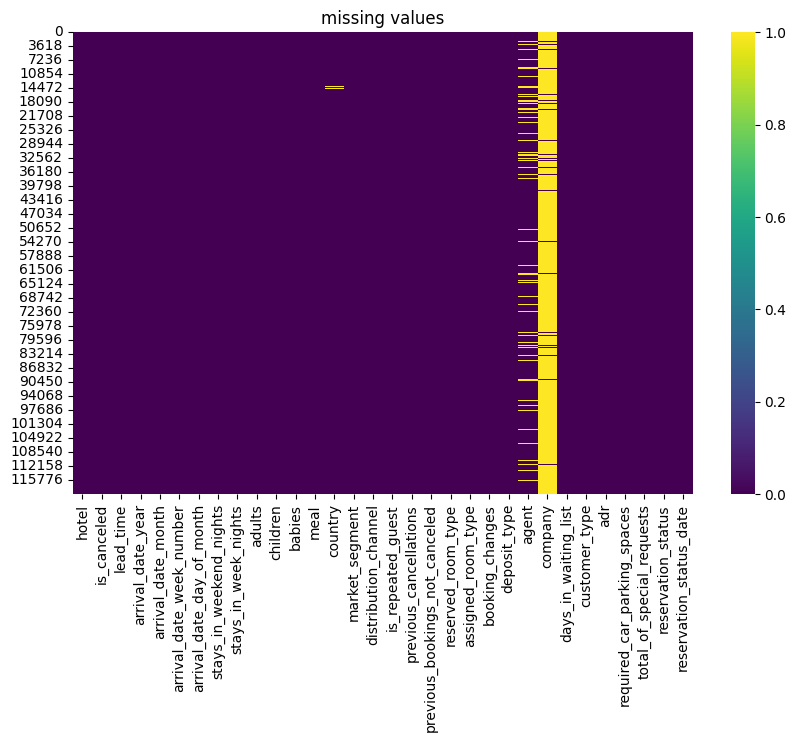

In [120]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap="viridis")
plt.title("missing values")
plt.show()

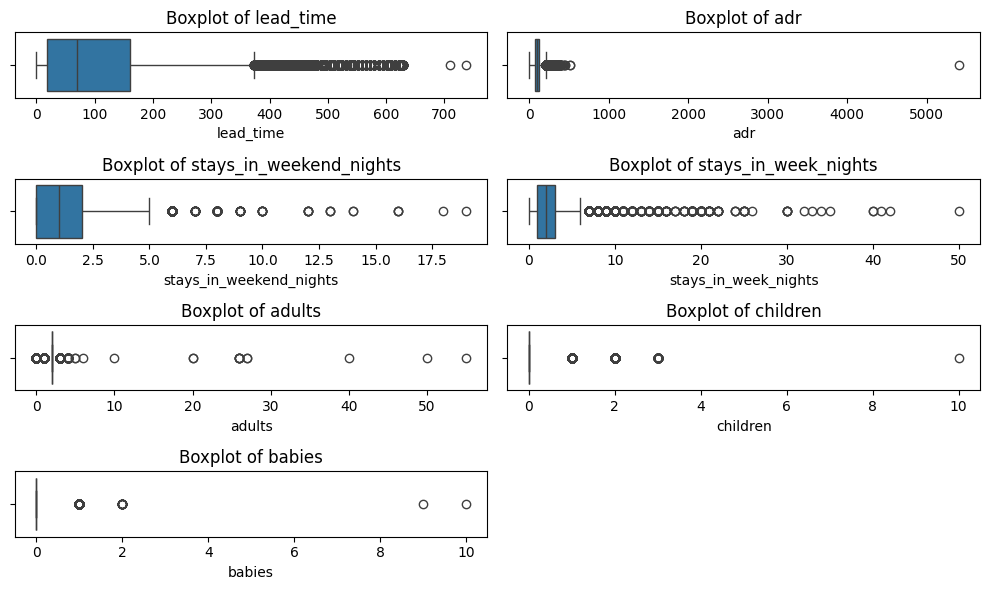

In [121]:
num_cols = ["lead_time", "adr", "stays_in_weekend_nights",
            "stays_in_week_nights", "adults", "children", "babies"]
plt.figure(figsize=(10,6))
for i,col in enumerate(num_cols,1):
  plt.subplot(4, 2,i)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [122]:
def iqr_outliers(data,column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  higher = Q3 + 1.5 * IQR
  outliers = data[(data[col] < lower) | (data[col] > higher)]
  return len(outliers), lower, higher,  outliers[column].min(), outliers[column].max()

In [123]:
outliers_report = {}

for col in num_cols:
  n_outliers, lower, higher, min_val, max_val = iqr_outliers(df, col)
  outliers_report[col] = {
        "Outliers": n_outliers,
        "Lower Bound": lower,
        "Upper Bound": higher,
        "Min Outlier": min_val,
        "Max Outlier": max_val
  }
outlier_df = pd.DataFrame(outliers_report).T
outlier_df

,Outliers,Lower Bound,Upper Bound,Min Outlier,Max Outlier
lead_time,3005.0,-195.000,373.000,374.00,737.0
adr,3793.0,-15.775,211.065,211.08,5400.0
stays_in_weekend_nights,265.0,-3.000,5.000,6.00,19.0
stays_in_week_nights,3354.0,-2.000,6.000,7.00,50.0
adults,29710.0,2.000,2.000,0.00,55.0
children,8590.0,0.000,0.000,1.00,10.0
babies,917.0,0.000,0.000,1.00,10.0


#phase 2

In [124]:
df1 = df.copy()

In [125]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [126]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [127]:
df1['company'] = df1['company'].fillna(0)
df1['agent'] = df1['agent'].fillna(0)
df1['children'] = df1['children'].fillna(df['children'].median())
df1['country'] = df1['country'].fillna('unknown')
df1 = df1.drop_duplicates()

In [148]:
df1['company']

,company
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
119385,0.0
119386,0.0
119387,0.0
119388,0.0


In [128]:
df1.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [129]:
num_cols = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights']
for col in num_cols:
    df1 = df1[df1[col] >= 0]

In [130]:
df1[num_cols].min()


,0
lead_time,0.0
adr,0.0
stays_in_weekend_nights,0.0
stays_in_week_nights,0.0


In [131]:
df1.loc[df1['adr'] > 1000, 'adr'] = 1000
df1['adr'].max()

1000.0

In [132]:
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'])

In [133]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87395 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87395 non-null  object        
 1   is_canceled                     87395 non-null  int64         
 2   lead_time                       87395 non-null  int64         
 3   arrival_date_year               87395 non-null  int64         
 4   arrival_date_month              87395 non-null  object        
 5   arrival_date_week_number        87395 non-null  int64         
 6   arrival_date_day_of_month       87395 non-null  int64         
 7   stays_in_weekend_nights         87395 non-null  int64         
 8   stays_in_week_nights            87395 non-null  int64         
 9   adults                          87395 non-null  int64         
 10  children                        87395 non-null  float64       
 11  babies

In [134]:
df1["market_segment"].head(10)

,market_segment
0,Direct
1,Direct
2,Direct
3,Corporate
4,Online TA
6,Direct
7,Direct
8,Online TA
9,Offline TA/TO
10,Online TA


In [135]:
#Features
df1['total_guests'] = df1['adults'] + df1['children'] + df1['babies']
df1['total_nights'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']
df1['is_family'] = np.where((df1['babies'] + df1['children']) > 0 ,"Yes", "No" )

In [136]:
print(df1['is_family'].value_counts())


is_family
No     78292
Yes     9103
Name: count, dtype: int64


In [137]:
# Drop leakage columns
df1 = df1.drop(['reservation_status', 'reservation_status_date'], axis=1)

In [138]:
df1['meal']

,meal
0,BB
1,BB
2,BB
3,BB
4,BB
...,...
119385,BB
119386,BB
119387,BB
119388,BB


In [139]:
low_cardinality = ['meal','market_segment', 'distribution_channel']
df1 = pd.get_dummies(df1 , columns= low_cardinality, drop_first= True)

In [140]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,False,True,False,False,False,False,True,False,False,False
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,False,True,False,False,False,False,True,False,False,False
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,False,True,False,False,False,False,True,False,False,False
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,True,False,False,False,False,False,False,False,False,False
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,False,False,False,False,True,False,False,False,True,False


In [141]:
le = LabelEncoder()

In [142]:
df1['is_family']= le.fit_transform(df1['is_family'])

In [143]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,False,True,False,False,False,False,True,False,False,False
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,False,True,False,False,False,False,True,False,False,False
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,False,True,False,False,False,False,True,False,False,False
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,True,False,False,False,False,False,False,False,False,False
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,False,False,False,False,True,False,False,False,True,False


from matplotlib import pyplot as plt
_df_0['lead_time'].plot(kind='hist', bins=20, title='lead_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['stays_in_week_nights'].plot(kind='hist', bins=20, title='stays_in_week_nights')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['adults'].plot(kind='hist', bins=20, title='adults')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['booking_changes'].plot(kind='hist', bins=20, title='booking_changes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('reserved_room_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('assigned_room_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('market_segment_Corporate').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='lead_time', y='stays_in_week_nights', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='stays_in_week_nights', y='adults', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='adults', y='booking_changes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='booking_changes', y='agent', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['is_canceled']
  ys = series['adults']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('is_canceled', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('is_canceled')
_ = plt.ylabel('adults')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['is_canceled']
  ys = series['adults']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('is_canceled', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('reserved_room_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='reserved_room_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('is_canceled')
_ = plt.ylabel('adults')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['is_canceled']
  ys = series['adults']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('is_canceled', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('assigned_room_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='assigned_room_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('is_canceled')
_ = plt.ylabel('adults')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['is_canceled']
  ys = series['adults']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('is_canceled', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('market_segment_Corporate')):
  _plot_series(series, series_name, i)
  fig.legend(title='market_segment_Corporate', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('is_canceled')
_ = plt.ylabel('adults')

from matplotlib import pyplot as plt
_df_16['lead_time'].plot(kind='line', figsize=(8, 4), title='lead_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['stays_in_week_nights'].plot(kind='line', figsize=(8, 4), title='stays_in_week_nights')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['adults'].plot(kind='line', figsize=(8, 4), title='adults')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['booking_changes'].plot(kind='line', figsize=(8, 4), title='booking_changes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['reserved_room_type'].value_counts()
    for x_label, grp in _df_20.groupby('country')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('country')
_ = plt.ylabel('reserved_room_type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['assigned_room_type'].value_counts()
    for x_label, grp in _df_21.groupby('reserved_room_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('reserved_room_type')
_ = plt.ylabel('assigned_room_type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['market_segment_Corporate'].value_counts()
    for x_label, grp in _df_22.groupby('assigned_room_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('assigned_room_type')
_ = plt.ylabel('market_segment_Corporate')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['market_segment_Direct'].value_counts()
    for x_label, grp in _df_23.groupby('market_segment_Corporate')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('market_segment_Corporate')
_ = plt.ylabel('market_segment_Direct')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='lead_time', y='country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['reserved_room_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='lead_time', y='reserved_room_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['assigned_room_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='lead_time', y='assigned_room_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['market_segment_Corporate'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='lead_time', y='market_segment_Corporate', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [144]:
df1['is_family'].value_counts()

,count
is_family,
0,78292
1,9103


In [149]:
country_freq = df1['country'].value_counts().to_dict()

df1['country'] = df1['country'].map(country_freq)

print(df1[['country']].head(20))


    country
0     27453
1     27453
2     10432
3     10432
4     10432
6     27453
7     27453
8     27453
9     27453
10    27453
11    27453
12     1875
13     7252
14    27453
15     3016
16    27453
17     3016
18     8837
19    10432
20    10432


In [157]:

X = df1.drop('is_canceled', axis=1)


y = df1['is_canceled']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y )

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (69916, 44)
Test shape: (17479, 44)


Overall Cancellation Rate: 27.49%
Average Lead Time (days): 79.89
Average Daily Rate (ADR): 106.29

Top 5 Countries by Bookings:
country
27453    27453
10432    10432
8837      8837
7252      7252
5387      5387
Name: count, dtype: int64

Bookings via Online Travel Agencies: 51618
Average Guests per Booking: 2.03


/tmp/ipython-input-1190081301.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=df1, palette='Set2')


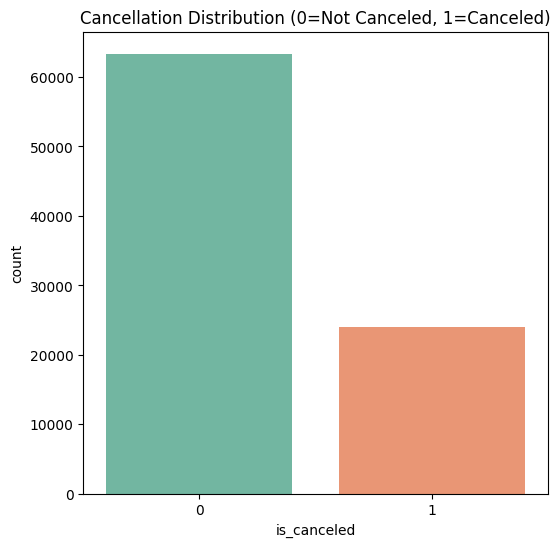

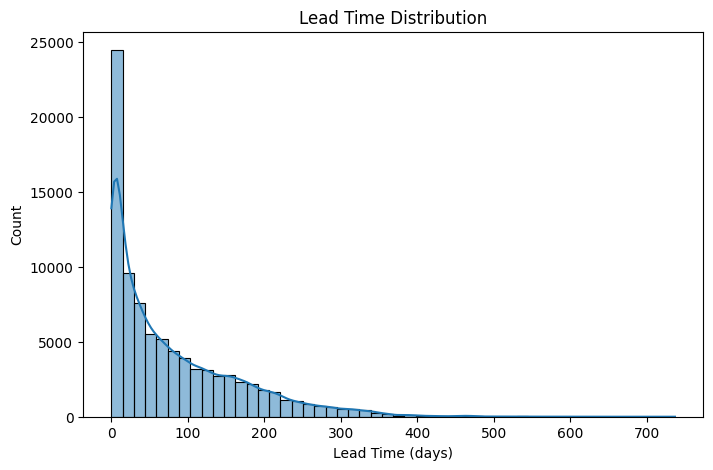

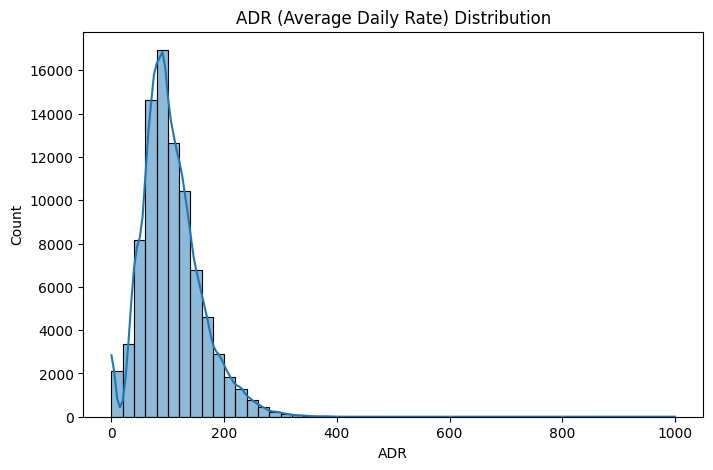

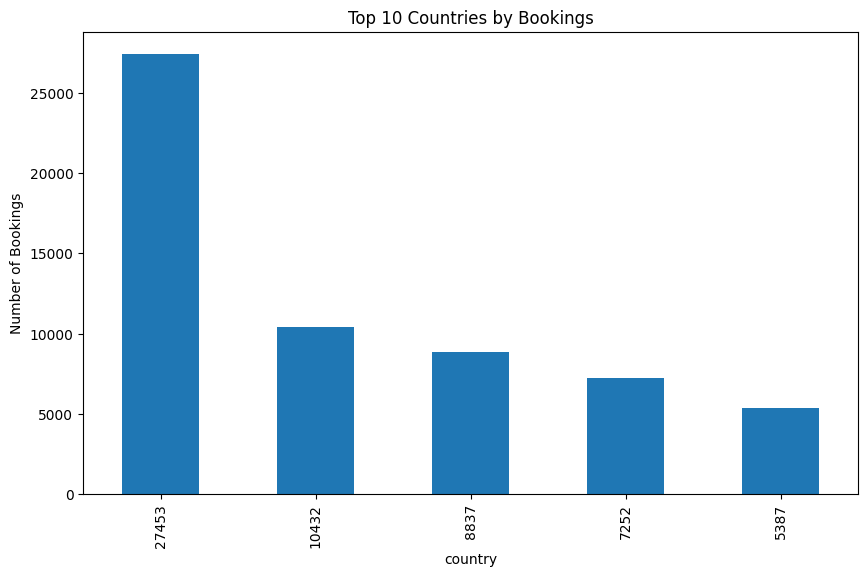

In [159]:

cancellation_rate = df1['is_canceled'].mean() * 100
print(f"Overall Cancellation Rate: {cancellation_rate:.2f}%")

avg_lead_time = df1['lead_time'].mean()
print(f"Average Lead Time (days): {avg_lead_time:.2f}")

avg_adr = df1['adr'].mean()
print(f"Average Daily Rate (ADR): {avg_adr:.2f}")

top_country = df1['country'].mode()[0]
country_counts = df1['country'].value_counts().head(5)
print("\nTop 5 Countries by Bookings:")
print(country_counts)

top_segment = df1['market_segment_Online TA'].sum()
print(f"\nBookings via Online Travel Agencies: {top_segment}")

avg_guests = df1['total_guests'].mean()
print(f"Average Guests per Booking: {avg_guests:.2f}")

plt.figure(figsize=(6,6))
sns.countplot(x='is_canceled', data=df1, palette='Set2')
plt.title("Cancellation Distribution (0=Not Canceled, 1=Canceled)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df1['lead_time'], bins=50, kde=True)
plt.title("Lead Time Distribution")
plt.xlabel("Lead Time (days)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df1['adr'], bins=50, kde=True)
plt.title("ADR (Average Daily Rate) Distribution")
plt.xlabel("ADR")
plt.show()
plt.figure(figsize=(10,6))
country_counts.head(10).plot(kind='bar')
plt.title("Top 10 Countries by Bookings")
plt.ylabel("Number of Bookings")
plt.show()
